# PREDICT PRICE

In [25]:
import csv
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
dates = []
prices =  []


In [26]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

def get_data2(filename):
    data = pd.read_csv('/Users/vlad3d/MACHINE_LEARNING/Learn_Python_for_Data_Science/AAPL2.csv')
    for i in range(len(data.index)):
        dat_dig = int(data['Date'][i].split('-')[2])
        dates.append( dat_dig )
        prices.append(float(data['Adj Close'][i]))
        
    return data
    
    
  



In [27]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1))
    svr_len = SVR(kernel = 'linear', C=1e3)
    svr_poly = SVR(kernel = 'poly', C=1e3, degree = 2)
    svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = 0.1)
    svr_len.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates, prices)

    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_len.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Poly model')




    #plt.plot(dates, svr_poly.predict(dates), color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return svr_rbf.predict(x)[0], svr_len.predict(x)[0], svr_poly.predict(x)[0]

    [2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 22, 23]


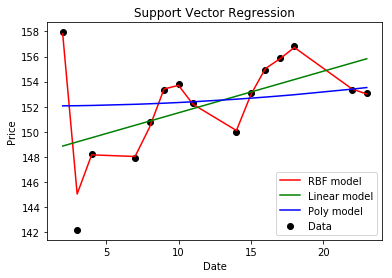

In [28]:
get_data2('AAPL2.csv')
#print(prices)
print('   ',dates)
predict_price = predict_prices(dates, prices, 10)
#print(predict_price)